# Gaussian XOR and Gaussian R-XOR Experiment with Task Unaware Settings

In [1]:
# import dependencies
import numpy as np
import random
from proglearn.sims import generate_gaussian_parity
import matplotlib.pyplot as plt
import seaborn as sns

# functions to perform the experiments in this notebook
import functions.gaussian_xor_rxor_aware_vs_unaware_fns as fn

## Ksample test
Using ksample test from hyppo we can determine at which angle rxor is significantly different enough from xor to require a new task/transformer. The following code using functions from xor_rxor_aware_unaware_fns.py to calculate p-values from k sample test dcorr from rxor angles 0 to 90 degrees for sample sizes 100, 500, and 1000. 

In [2]:
# number of times to run the experiment, decrease for shorter run times
mc_rep = 10
# set angle range
angle_sweep = range(0, 90, 1)

In [3]:
# calculates and plots angle vs pvalue from ksample test xor vs rxor
# returns numpy array containing all p-vals from all mc_rep experiments at all angles in angle_sweep
pvals_100, pvals_500, pvals_1000 = fn.calc_ksample_pval_vs_angle(mc_rep, angle_sweep)

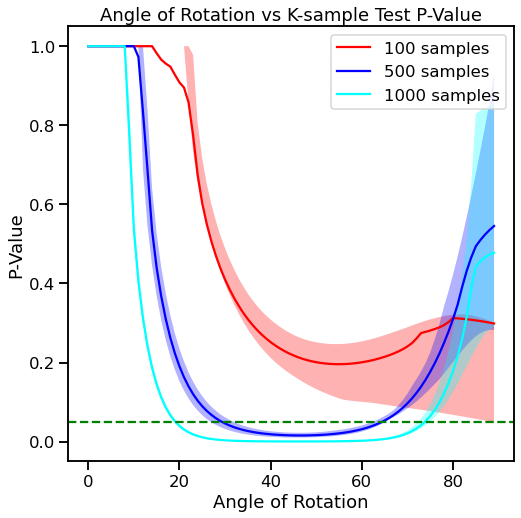

In [4]:
# sets plotting params
sns.set_context("talk")
# plots the mean p-values of the mc_rep experiments with error bars
# dotted green line at p-value = 0.05
plt.figure(figsize=(8, 8))
fn.plot_pval_vs_angle(pvals_100, pvals_500, pvals_1000, angle_sweep)

## Task aware BTE and generalization error (XOR)
Next, we'll run the progressive learner to see how different angles of rxor affect backward transfer efficiency and multitask generalization error of xor (task1). We start by defining the following hyperparameters.

In [5]:
# number of times to run the experiment, decrease for shorter run times
mc_rep = 100
# samples to use for task1 (xor)
task1_sample = 100
# samples to use for task2 (rxor)
task2_sample = 100
# we will use the same angle_sweep as before
angle_sweep = range(0, 90, 1)

In [6]:
# call the function to run the experiment
# give us arrays with mean_te and mean_error
mean_te, mean_error = fn.bte_ge_v_angle(angle_sweep, task1_sample, task2_sample, mc_rep)

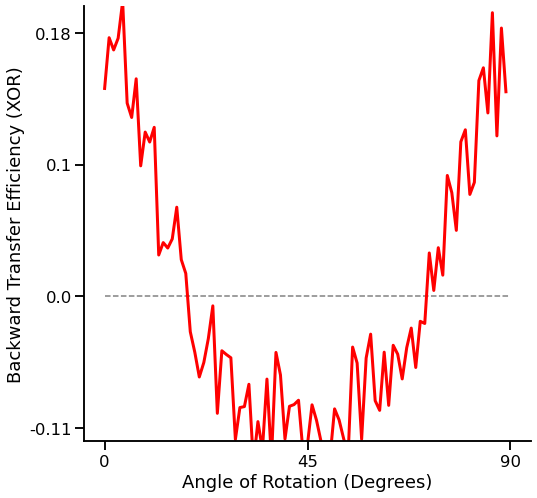

In [7]:
# plot angle vs BTE
fn.plot_bte_v_angle(mean_te)

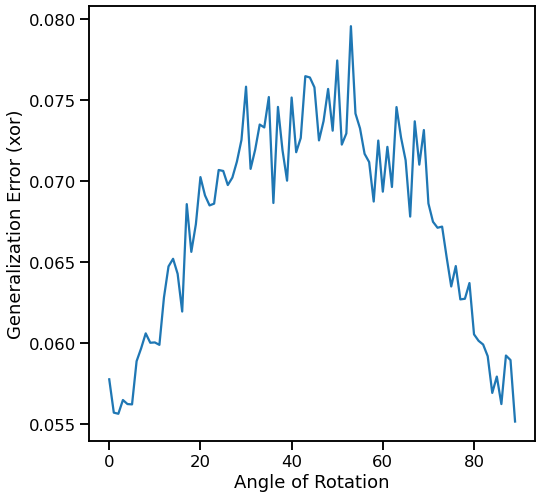

In [8]:
# plot angle vs generalization error
plt.figure(figsize=(8, 8))
plt.plot(angle_sweep, mean_error[:, 1])
plt.xlabel("Angle of Rotation")
plt.ylabel("Generalization Error (xor)")
plt.show()

## Task Unaware: K-sample testing "dcorr"
Instead of adding a new task for every angle of rxor, we use a k sample test to determine when rxor is different enough to warrant adding a new task. Then we plot the BTE and multitask generalization error of xor (task1). Once again, we start by definining hyperparameters. We will examine BTE and generalization error for 100, 500, and 1000 task samples.

### 100 task samples

In [9]:
# number of times to run the experiment, decrease for shorter run times
mc_rep = 100
# samples to use for task1 (xor)
task1_sample = 100
# samples to use for task2 (rxor)
task2_sample = 100
# we will use the same angle_sweep as before
angle_sweep = range(0, 90, 1)

In [10]:
# call our function to run the experiment
un_mean_te, un_mean_error = fn.unaware_bte_v_angle(
    angle_sweep, task1_sample, task2_sample, mc_rep
)

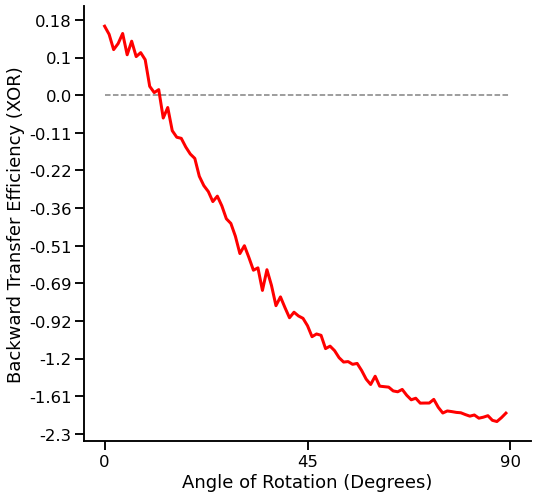

In [11]:
# plot angle vs BTE
fn.plot_unaware_bte_v_angle(un_mean_te)

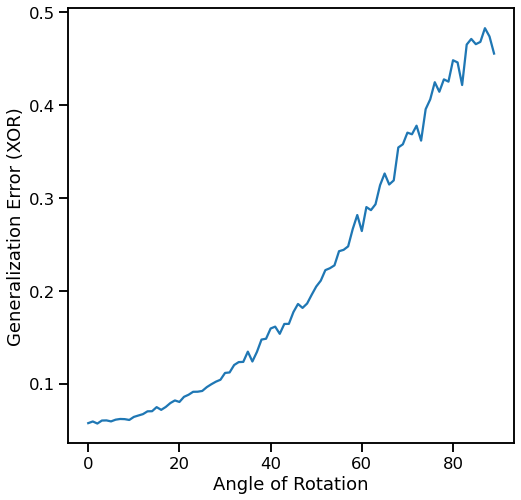

In [12]:
# plot angle vs generalization error
plt.figure(figsize=(8, 8))
plt.plot(angle_sweep, un_mean_error[:, 1])
plt.xlabel("Angle of Rotation")
plt.ylabel("Generalization Error (XOR)")
plt.show()

### 500 task samples

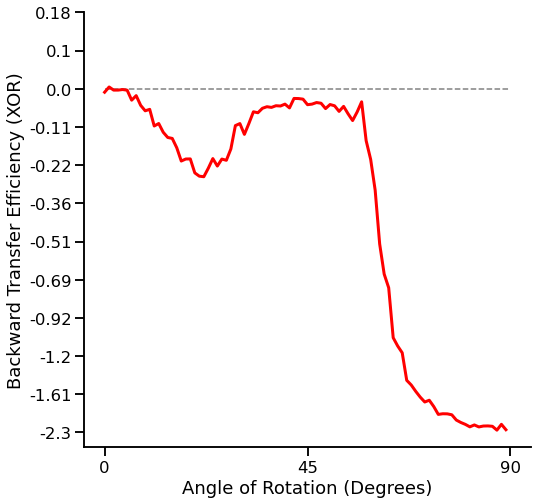

In [13]:
# number of times to run the experiment, decrease for shorter run times
mc_rep = 100
# samples to use for task1 (xor)
task1_sample = 500
# samples to use for task2 (rxor)
task2_sample = 500
# we will use the same angle_sweep as before
angle_sweep = range(0, 90, 1)

# call our function to run the experiment
un_mean_te, un_mean_error = fn.unaware_bte_v_angle(
    angle_sweep, task1_sample, task2_sample, mc_rep
)
# plot angle vs BTE
fn.plot_unaware_bte_v_angle(un_mean_te)

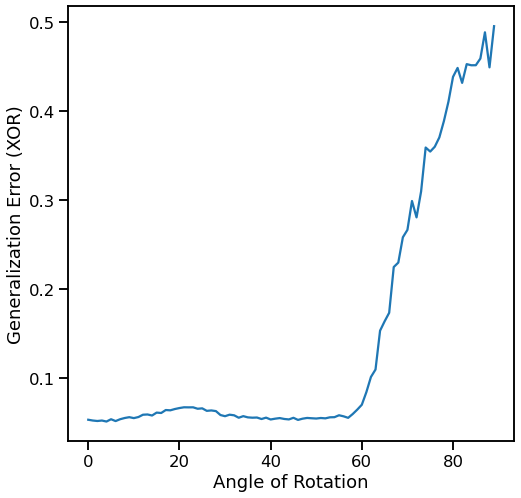

In [14]:
# plot angle vs generalization error
plt.figure(figsize=(8, 8))
plt.plot(angle_sweep, un_mean_error[:, 1])
plt.xlabel("Angle of Rotation")
plt.ylabel("Generalization Error (XOR)")
plt.show()

### 1000 task samples

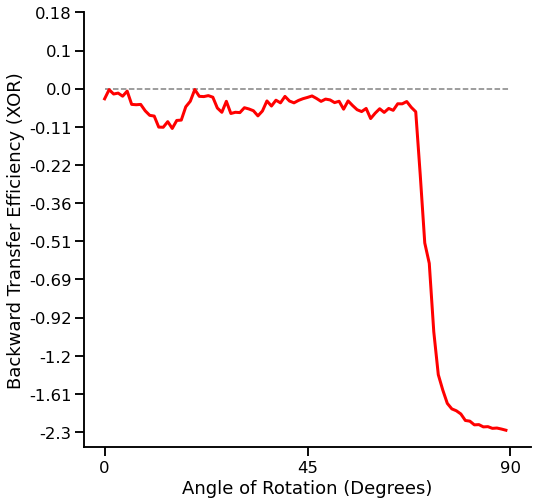

In [15]:
# number of times to run the experiment, decrease for shorter run times
mc_rep = 100
# samples to use for task1 (xor)
task1_sample = 1000
# samples to use for task2 (rxor)
task2_sample = 1000
# we will use the same angle_sweep as before
angle_sweep = range(0, 90, 1)

# call our function to run the experiment
un_mean_te, un_mean_error = fn.unaware_bte_v_angle(
    angle_sweep, task1_sample, task2_sample, mc_rep
)
# plot angle vs BTE
fn.plot_unaware_bte_v_angle(un_mean_te)

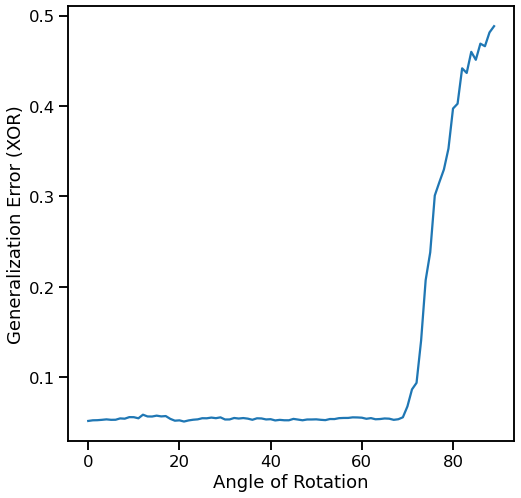

In [16]:
# plot angle vs generalization error
plt.figure(figsize=(8, 8))
plt.plot(angle_sweep, un_mean_error[:, 1])
plt.xlabel("Angle of Rotation")
plt.ylabel("Generalization Error (XOR)")
plt.show()